In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from matplotlib.lines import Line2D



In [2]:
colors = ["lightgreen", "lightcoral", "steelblue"]
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

project_dir = str(Path(os.getcwd()).parent)
datasets_path = project_dir + "/datasets/"
df = pd.read_csv(datasets_path + "down_detector_outage_count.csv")

In [3]:
df["date"] = pd.to_datetime(df["timestamp"], unit='s')
df['day_of_week'] = df['date'].dt.dayofweek
df['hour_of_day'] = df['date'].dt.hour
df["month"] = df["date"].dt.month
df["provider"] = df['provider'].replace('aws', 'Amazon Web Services').replace('azure', "Microsoft Azure").replace("gcp", "Google Cloud")

In [4]:
df_aws = df[df["provider"] == "Amazon Web Services"]
df_aws["da"] = df_aws["date"].dt.date

<ipython-input-4-052f52044c42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aws["da"] = df_aws["date"].dt.date


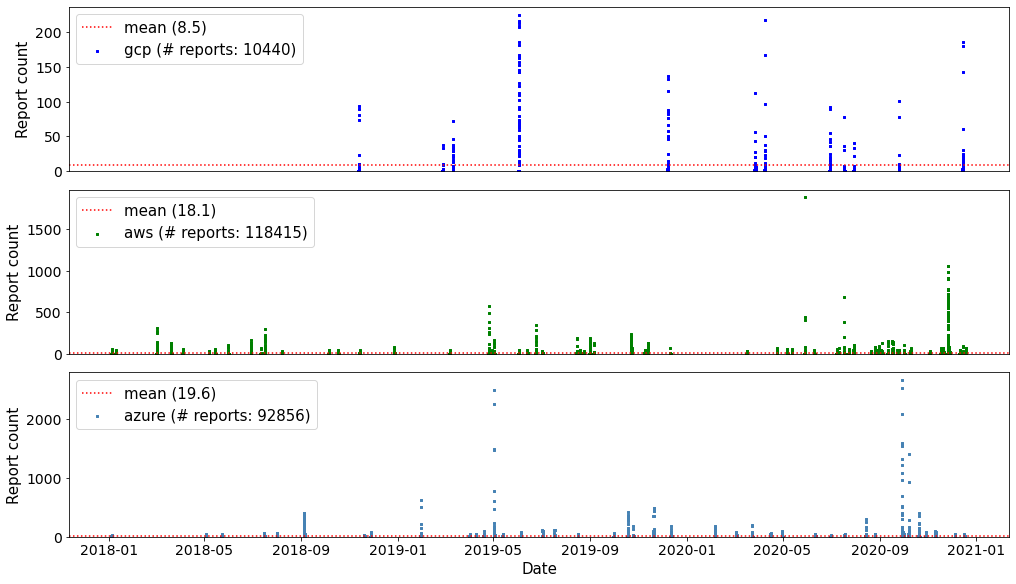

In [4]:
providers = set(df["provider"].values)
colors = ["blue", "green", "steelblue"]
_, ax = plt.subplots(3, 1, figsize=(14, 8), sharex=True, constrained_layout=True)
for i, service in enumerate(providers):
    df_service = df[df["provider"] == service]
    
    ax[i].scatter(df_service["date"].values, 
                  df_service["count"].values, 
                  c=colors[i], 
                  label=service + " (# reports: " + str(df_service["count"].sum())  + ")", 
                  s=4, marker='s')
    
    ax[i].axhline(y=np.mean(df_service["count"].values), ls='dotted', c="red", label="mean (%s)" % str(round(np.mean(df_service["count"].values), 1)))
    ax[i].set_ylabel("Report count", fontsize=15)
    ax[i].set_xlabel("Date", fontsize=15)
    ax[i].legend(loc="upper left", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[i].set_ylim(0, )
    if i != len(providers) - 1:
        ax[i].get_xaxis().set_visible(False)

plt.savefig("./plots/general_report_count_dots.pdf", dpi=100)

<ipython-input-9-6d0761475bed>:6: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(hspace=0.05, left=0.08, top=0.99, bottom=0.1, right=0.99)
<ipython-input-9-6d0761475bed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_service["day"] = df_service["date"].dt.date


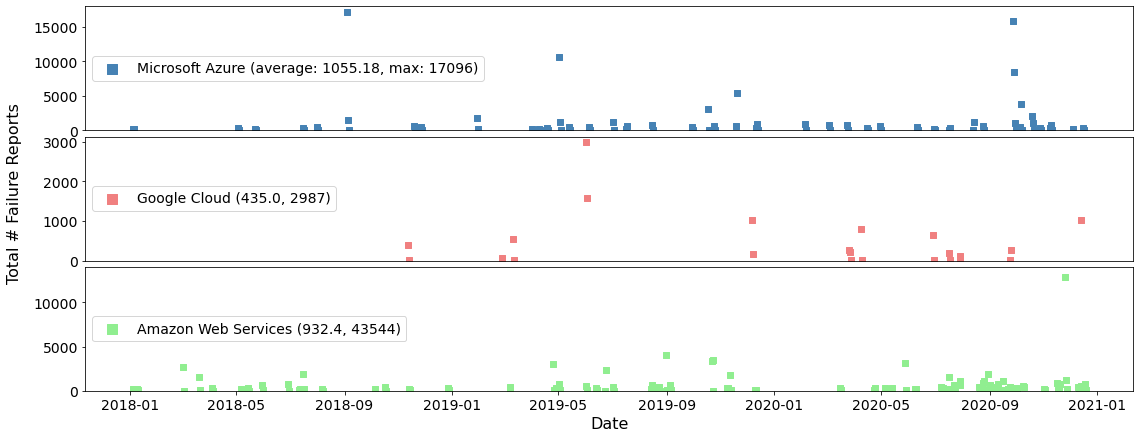

In [9]:
colors = ["steelblue", "lightcoral", "lightgreen"]
providers = set(df["provider"].values)

handles, labels = [], []
_, ax = plt.subplots(3, 1, figsize=(16, 6), sharex=True, constrained_layout=True)
plt.subplots_adjust(hspace=0.05, left=0.08, top=0.99, bottom=0.1, right=0.99)
for i, service in enumerate(providers):
    df_service = df[df["provider"] == service]
    df_service["day"] = df_service["date"].dt.date
    partial_grouped_df = df_service.groupby('day')['count'].sum().reset_index()
    if i == 0:
        ax[i].scatter(partial_grouped_df["day"].values, 
                      partial_grouped_df["count"].values, 
                      c=colors[i], 
                      label=service + " (average: " +  str(round(np.mean(partial_grouped_df["count"]), 2)) + ", max: " + str(np.max(partial_grouped_df["count"])) +  ")", 
                      s=30, marker='s')
    else:
         ax[i].scatter(partial_grouped_df["day"].values, 
                  partial_grouped_df["count"].values, 
                  c=colors[i], 
                  label=service + " (" +  str(round(np.mean(partial_grouped_df["count"].values), 2)) + ", " + str(np.max(partial_grouped_df["count"])) + ")", 
                  s=30, marker='s')
    
    ax[1].set_ylabel("Total # Failure Reports", fontsize=16)
    ax[1].yaxis.set_label_coords(-0.06, 0.55)
    
    ax[i].legend(fontsize=14, loc="center left", markerscale=2)
    ax[i].tick_params(axis='both', labelsize=14)
    
    if i == 2:
        ax[i].set_ylim(0, 14000)
        ax[i].legend(fontsize=14, loc="center left", markerscale=2)
        ax[i].set_xlabel("Date", fontsize=16)
    else:
        ax[i].set_ylim(0, )
        ax[i].get_xaxis().set_visible(False)
    
    

plt.savefig(project_dir + "/plots/total_report_count_dots.pdf", dpi=100)


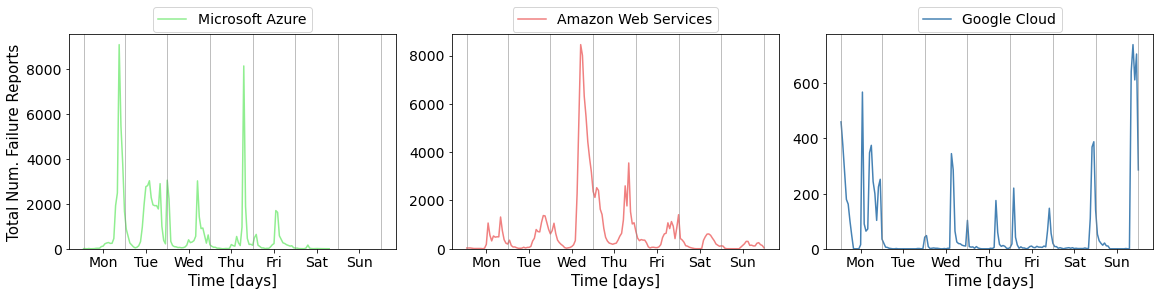

In [16]:
DAY = 24
MID_DAY = int(DAY / 2)
WEEK = 7 * DAY
colors = ["lightgreen", "steelblue", "lightcoral"]

providers = df["provider"].unique()
fig, ax = plt.subplots(1, 3, figsize=(16, 4), constrained_layout=True)
for i, vendor in enumerate(providers):
    df_vendor = df[df["provider"] == vendor]
    partial_grouped_df = df_vendor.groupby(['day_of_week', 'hour_of_day'])['count'].sum().reset_index().rename(columns={'count': 'count_sum'})
    ax[i].plot(partial_grouped_df.index, partial_grouped_df["count_sum"], color=colors[i], label=vendor)
    ax[i].set_ylim(0, )
    ax[0].set_ylabel("Total Num. Failure Reports", fontsize=15)
    ax[i].set_xlabel("Time [days]", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[i].set_xticks([tick for tick in range(MID_DAY-1, WEEK, DAY)])
    ax[i].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], fontsize=14)
    ax[i].legend(loc='center', bbox_to_anchor=(0.5, 1.07), ncol=1, fontsize=14)
    xcoords = [0] + [xcoord for xcoord in range(23, WEEK, DAY)]
    for xc in xcoords:
        ax[i].axvline(x=xc, color="gray", lw=0.5)

plt.savefig("./plots/weekly_total_num_failure_reports.pdf", dpi=100)
        

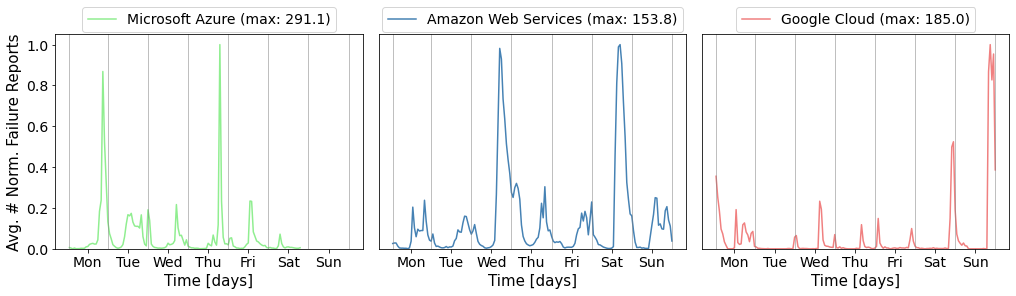

In [8]:
DAY = 24
MID_DAY = int(DAY / 2)
WEEK = 7 * DAY
colors = ["lightgreen", "steelblue", "lightcoral"]

providers = df["provider"].unique()
fig, ax = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True, sharey=True)
for i, vendor in enumerate(providers):
    df_vendor = df[df["provider"] == vendor]
    partial_grouped_df = df_vendor.groupby(['day_of_week', 'hour_of_day'])['count'].mean().reset_index().rename(columns={'count': 'count_mean'})
    max_val = partial_grouped_df["count_mean"].max()
    partial_grouped_df = partial_grouped_df / partial_grouped_df.max()
    ax[i].plot(partial_grouped_df.index, partial_grouped_df["count_mean"], color=colors[i], label=vendor + " (max: " + str(round(max_val, 1)) + ")")
    ax[i].set_ylim(0, )
    ax[0].set_ylabel("Avg. # Norm. Failure Reports", fontsize=15)
    if i != 0:
        ax[i].get_yaxis().set_visible(False)
    ax[i].set_xlabel("Time [days]", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[i].legend(loc='center', bbox_to_anchor=(0.5, 1.07), ncol=1, fontsize=14)
    ax[i].set_xticks([tick for tick in range(MID_DAY-1, WEEK, DAY)])
    ax[i].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], fontsize=14)
    
    xcoords = [0] + [xcoord for xcoord in range(23, WEEK, DAY)]
    for xc in xcoords:
        ax[i].axvline(x=xc, color="gray", lw=0.5)
         
plt.savefig(project_dir + "/plots/weekly_avg_num_failure_reports.pdf", dpi=100)
        

In [12]:
# Azure doesn't contain any reports on Sunday.
df_azure = df[df["provider"] == "Microsoft Azure"]
df_azure.day_of_week.unique()

<ipython-input-12-6120b634813e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_azure["days"] = df_azure["date"].dt.dayofweek


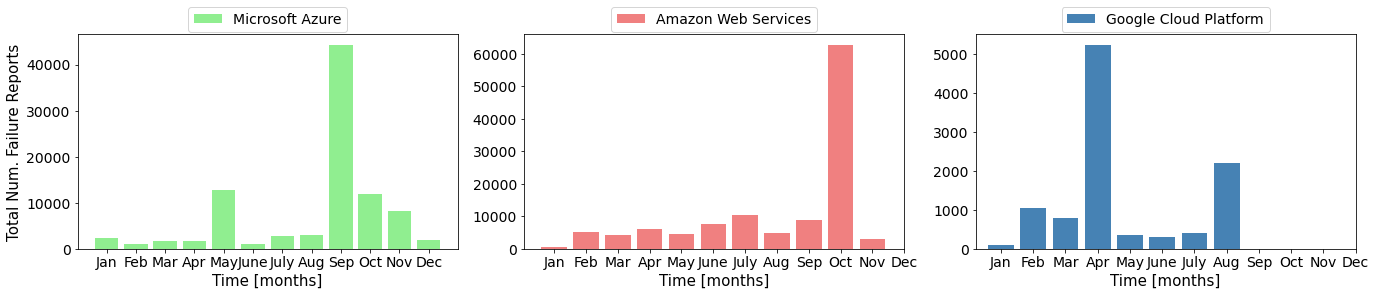

In [93]:
providers = df["provider"].unique()
vendors = {
    'aws': "Amazon Web Services", 
    'gcp': "Google Cloud Platform",
    'azure': "Microsoft Azure"
}
fig, ax = plt.subplots(1, 3, figsize=(19, 4), constrained_layout=True)
for i, vendor in enumerate(providers):
    df_vendor = df[df["provider"] == vendor]
    partial_grouped_df = df_vendor.groupby('month')['count'].sum().reset_index().rename(columns={'count': 'count_sum'})
    ax[i].bar(partial_grouped_df.index, partial_grouped_df["count_sum"], color=colors[i], label=vendors[vendor])
    ax[i].set_ylim(0, )
    ax[0].set_ylabel("Total Num. Failure Reports", fontsize=15)
    ax[i].set_xlabel("Time [months]", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[i].legend(loc='center', bbox_to_anchor=(0.5, 1.07), ncol=1, fontsize=14)
    ax[i].set_xticks([month for month in range(12)])
    ax[i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=14)

plt.savefig("./plots/monthly_total_num_failure_reports.pdf", dpi=100)

No handles with labels found to put in legend.


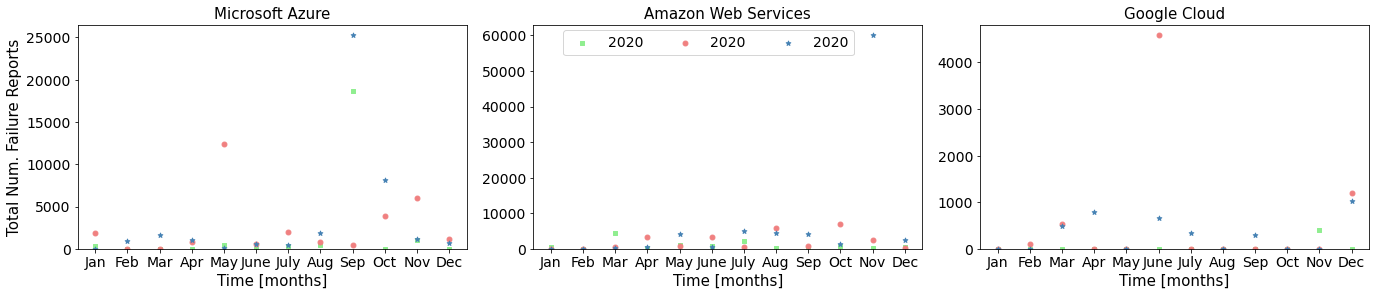

In [107]:
df["year"] = df["date"].dt.year
years = df["year"].unique()

providers = df["provider"].unique()
fig, ax = plt.subplots(1, 3, figsize=(19, 4), constrained_layout=True)
for i, vendor in enumerate(providers):
    
    dfs = dict()
    df_vendor = df[df["provider"] == vendor]
    for year in years:
        df_year_vendor = df_vendor[df_vendor["year"] == year]
        partial_grouped_df = df_year_vendor.groupby('month')['count'].sum().reset_index().rename(columns={'count': 'count_sum'})
        dfs[year] = partial_grouped_df
        
    # Add missing months
    months = [i for i in range(1, 13)]
    for year in years:
        for m in months:
            if m not in dfs[year]["month"].values:
                dfi = dfs[year]
                dfi = dfi.append({'month': m, 'count_sum': 0}, ignore_index=True)
                dfs[year] = dfi.sort_values("month")
    
    ax[i].scatter(dfs[2018]["month"], dfs[2018]["count_sum"], color=colors[0], label=2018, marker='s', s=24)
    ax[i].scatter(dfs[2019]["month"], dfs[2019]["count_sum"], color=colors[1], label=2019, s=24)
    ax[i].scatter(dfs[2020]["month"], dfs[2020]["count_sum"], color=colors[2], label=2020, marker='*', s=24)

    ax[i].set_ylim(0, )
    ax[i].set_title(vendor, fontsize=15)
    ax[0].set_ylabel("Total Num. Failure Reports", fontsize=15)
    ax[i].set_xlabel("Time [months]", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[1].legend(loc='center', bbox_to_anchor=(0.45, 0.92), ncol=3, fontsize=14)
    ax[i].set_xticks([month for month in range(1, 13)])
    ax[i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=14)

plt.savefig("./plots/monthly_yearly_total_num_failure_reports.pdf", dpi=100)

No handles with labels found to put in legend.


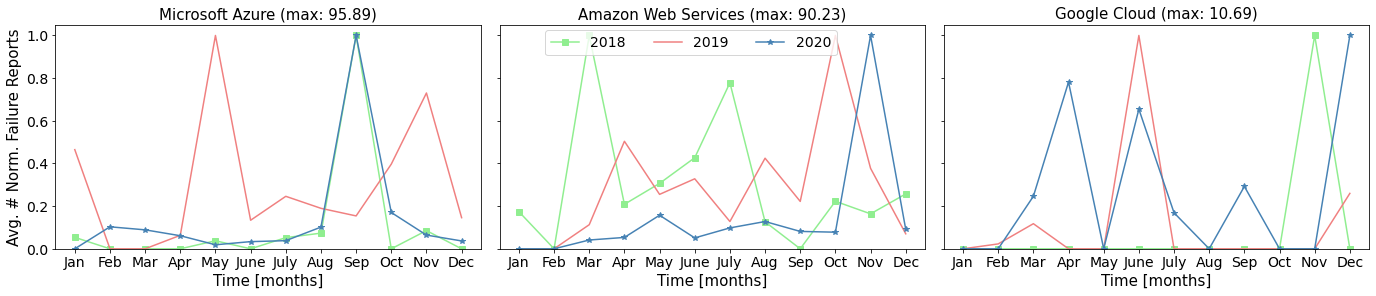

In [29]:
df["year"] = df["date"].dt.year
years = df["year"].unique()

providers = df["provider"].unique()
fig, ax = plt.subplots(1, 3, figsize=(19, 4), constrained_layout=True, sharey=True)
for i, vendor in enumerate(providers):
    
    dfs = dict()
    df_vendor = df[df["provider"] == vendor]
    for year in years:
        df_year_vendor = df_vendor[df_vendor["year"] == year]
        partial_grouped_df = df_year_vendor.groupby('month')['count'].mean().reset_index().rename(columns={'count': 'count_sum'})
        max_val = partial_grouped_df["count_sum"].max()
        partial_grouped_df["count_sum"] = partial_grouped_df["count_sum"] / max_val
        dfs[year] = partial_grouped_df
        
    # Add missing months
    months = [i for i in range(1, 13)]
    for year in years:
        for m in months:
            if m not in dfs[year]["month"].values:
                dfi = dfs[year]
                dfi = dfi.append({'month': m, 'count_sum': 0}, ignore_index=True)
                dfs[year] = dfi.sort_values("month")
    
    ax[i].plot(dfs[2018]["month"], dfs[2018]["count_sum"], color=colors[0], label=2018, marker='s')
    ax[i].plot(dfs[2019]["month"], dfs[2019]["count_sum"], color=colors[1], label=2019)
    ax[i].plot(dfs[2020]["month"], dfs[2020]["count_sum"], color=colors[2], label=2020, marker='*')

    ax[i].set_ylim(0, )
    ax[0].set_ylabel("Avg. # Norm. Failure Reports", fontsize=15)
    ax[i].set_xlabel("Time [months]", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[i].set_title(vendor + " (max: " + str(round(max_val, 2)) + ")", fontsize=15)
    ax[1].legend(loc='center', bbox_to_anchor=(0.45, 0.92), ncol=3, fontsize=14)
    ax[i].set_xticks([month for month in range(1, 13)])
    ax[i].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=14)

plt.savefig(project_dir + "/plots/monthly_yearly_avg_num_failure_reports_lineplot.pdf", dpi=100)

<ipython-input-5-9457df2d8f63>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=14)
<ipython-input-5-9457df2d8f63>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=14)


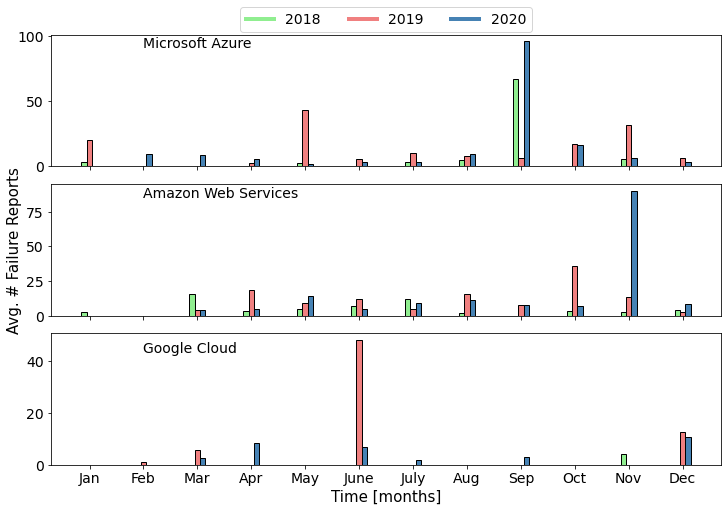

In [5]:
df["year"] = df["date"].dt.year
years = df["year"].unique()
bar_w = 0.1
colors = ["lightgreen", "lightcoral", "steelblue"]
providers = df["provider"].unique()
fig, ax = plt.subplots(3, 1, figsize=(10, 7), constrained_layout=True)
for i, vendor in enumerate(providers):
    
    bar_locs = []
    bar_heights = []
    months = [i for i in range(1, 13)]
    dfs = {2018: [], 2019: [], 2020: []}
    
    df_vendor = df[df["provider"] == vendor]
    for year in years:
        df_year_vendor = df_vendor[df_vendor["year"] == year]
        partial_grouped_df = df_year_vendor.groupby('month')['count'].mean().reset_index().rename(columns={'count': 'count_sum'})
        for m in months:
            if m not in partial_grouped_df["month"].values:
                partial_grouped_df = partial_grouped_df.append({'month': m, 'count_sum': 0}, ignore_index=True)
            
            partial_grouped_df = partial_grouped_df.sort_values("month")        
        dfs[year] = partial_grouped_df
    
    for idx, m in enumerate(months):
        df_months = []
        for year in years:
            dfi = dfs[year]
            df_m = dfi[dfi["month"] == m]
            df_months.append(df_m)
            
        bar_locs.extend([idx - bar_w, idx, idx + bar_w])
        bar_heights.extend([df_months[0]['count_sum'].values[0], df_months[1]['count_sum'].values[0], df_months[2]['count_sum'].values[0]])

    ax[i].bar(
         x=bar_locs, 
         height=bar_heights, 
         width=bar_w, 
         align='center',
         color=colors * int(len(bar_heights) / 3),
         edgecolor='black'
    )
    
    ax[i].set_ylim(0, )
    if i != len(providers) - 1:
        ax[i].set_xticklabels([])
        
    ax[0].legend(custom_lines, ['2018', '2019', '2020'], ncol=3, loc='center', bbox_to_anchor=(0.5, 1.12), fontsize=14)
    ax[1].set_ylabel("Avg. # Failure Reports", fontsize=15)
    ax[2].set_xlabel("Time [months]", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=14)
    ax[i].text(x=1, y=max(bar_heights)-5, s=vendor, fontsize=14)
    ax[i].set_xticks([month for month in range(0, 12)])
    ax[2].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=14)
    
    
    bar_locs = []
    bar_heights = []
    
plt.savefig(project_dir + "/plots/monthly_yearly_avg_num_failure_reports_barplots.pdf", dpi=100)